In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [ ]:
industriesPercentAbleToWorkAtHome = {
    "Mining, logging, construction": 0,
    "Manufacturing": 0,
    "Trade, transportation, and utilities": 0.03,
    "Information": 1,
    "Financial activities": 0.88,
    "Professional and business services": 0.88,
    "Education and health services": 0.98,
    "Leisure and hospitality": 0,
    "Other services": 0.5,
    "Government": 0.65,
}

USIndustryYears = np.array([2000,2005,2010,2015,2019])
UKIndustryYears = np.array([2005,2010,2015,2019])

numUSEmployeesByIndustryByCity = {
    "Seattle": {
        "Mining, logging, construction": [101700,104700,83600,107100,127600,129900,109600],
        "Manufacturing": [212800,171300,167000,188200,184300,168400,142200],
        "Trade, transportation, and utilities": [325600,313200,301600,354400,398000,390300,332600],
        "Information": [79500,77700,87700,97500,128400,133700,139000],
        "Financial activities": [101800,106700,92100,95900,101400,100400,87600],
        "Professional and business services": [220500,214400,220700,268600,302100,295700,277500],
        "Education and health services": [183700,198400,231500,251300,283000,272100,223500],
        "Leisure and hospitality": [145800,152500,155700,185200,207800,150600,133000],
        "Other services": [57800,61800,63200,70200,78700,71100,59300],
        "Government": [236000,252100,264200,270300,275500,266000,206700],
    },
    'Omaha': {
        "Mining, logging, construction": [23500,25700,20900,25800,30500,30400,30700],
        "Manufacturing": [35700,32900,31200,32700,33600,33000,33500],
        "Trade, transportation, and utilities": [108100,99700,94100,98200,96100,91800,94100],
        "Information": [15300,13300,11200,11600,10500,9900,9800],
        "Financial activities": [35800,37600,40500,42200,46000,45500,44100],
        "Professional and business services": [60400,61700,63500,73600,73100,70900,71900],
        "Education and health services": [55200,61200,71500,76100,79700,78000,79600],
        "Leisure and hospitality": [41100,42200,43800,48400,52000,43300,47500],
        "Other services": [14400,16400,17800,18300,18600,17700,18300],
        "Government": [55300,59900,65300,65900,66900,65200,65200],
    },
    'Scranton': {
        "Mining, logging, construction": [10700,10600,9400,10200,10500,9800,10300],
        "Manufacturing": [45600,34900,27800,27000,28600,26900,27200],
        "Trade, transportation, and utilities": [55600,58500,58900,62600,63500,61900,63900],
        "Information": [7000,6300,5000,3500,2900,2600,2500],
        "Financial activities": [13700,13400,12400,12600,13100,13000,13000],
        "Professional and business services": [23000,23400,25000,29800,28300,25500,26100],
        "Education and health services": [45300,49100,52200,51900,55200,51500,50500],
        "Leisure and hospitality": [19000,22000,21800,23300,23500,17800,18200],
        "Other services": [10000,10000,8300,8500,8800,7500,7700],
        "Government": [31200,31700,31700,29400,29000,27900,28300],
    },
}

numUKEmployeesByIndustryByCity = {
    "Liverpool": {
        "Mining, logging, construction": [141000,138700,138000,150300,153500,146240],
        "Manufacturing": [80200,73900,80500,100200,107500,103120],
        "Trade, transportation, and utilities": [92000,109100,128300,146900,145800,146100],
        "Information": [59900,68400,66800,72100,73300,73120],
        "Financial activities": [22400,21105,22890,22820,20160,25592],
        "Professional and business services": [41600,39195,42510,42380,37440,47528],
        "Education and health services": [29000,24450,22900,23850,21450,23900],
        "Leisure and hospitality": [69800,59800,66400,64000,69600,69700],
        "Other services": [70400,78700,73800,80200,75000,73120],
        "Government": [29000,24450,22900,23850,21450,26560],
    },
    "Barry (Wales)": {
        "Mining, logging, construction": [4100,3500,4500,4600,3300,4100],
        "Manufacturing": [5700,4300,3500,4900,4800,5700],
        "Trade, transportation, and utilities": [1400,900,1400,800,1200,1400],
        "Information": [4000,4400,3800,3900,3600,4000],
        "Financial activities": [3045,2940,3710,3535,4095,3045],
        "Professional and business services": [5655,5460,6890,6565,7605,5655],
        "Education and health services": [9700,9800,10550,10850,11550,9700],
        "Leisure and hospitality": [9500,10800,11200,13000,8000,9500],
        "Other services": [2400,4000,2800,3700,3100,2400],
        "Government": [9700,9800,10550,10850,11550,9700],
    },
}

# turn all lists into numpy arrays
for city in numUKEmployeesByIndustryByCity:
    for industry in numUKEmployeesByIndustryByCity[city]:
        numUKEmployeesByIndustryByCity[city][industry] = np.array(numUKEmployeesByIndustryByCity[city][industry])
        # removes final two years from data due to covid skewing data
        numUKEmployeesByIndustryByCity[city][industry] = numUKEmployeesByIndustryByCity[city][industry][:-2]

for city in numUSEmployeesByIndustryByCity:
    for industry in numUSEmployeesByIndustryByCity[city]:
        numUSEmployeesByIndustryByCity[city][industry] = np.array(numUSEmployeesByIndustryByCity[city][industry])
        # removes final two years from data due to covid skewing data
        numUSEmployeesByIndustryByCity[city][industry] = numUSEmployeesByIndustryByCity[city][industry][:-2]

r^2: 0.9650164302266793


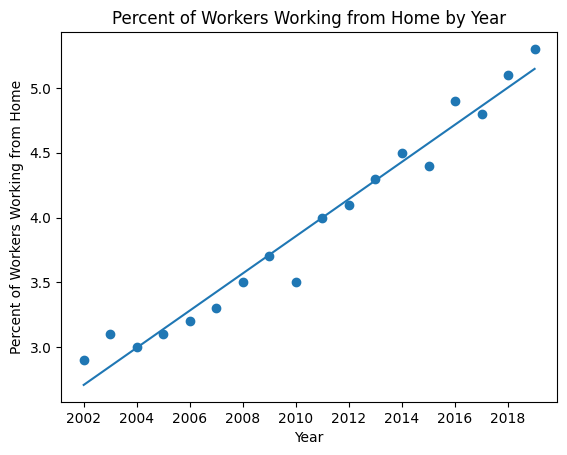

In [17]:
# data
years = np.array([2002,2003,2004,2005,2006,2007,2008,2009,2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
percentWorkersHome = np.array([
    2.90,
    3.10,
    3.00,
    3.10,
    3.20,
    3.30,
    3.50,
    3.70,
    3.50,
    4.00,
    4.10,
    4.30,
    4.50,
    4.40,
    4.90,
    4.80,
    5.10,
    5.30,
])

# plot with linear regression
plt.scatter(years, percentWorkersHome)
plt.xlabel('Year')
plt.ylabel('Percent of Workers Working from Home')
plt.title('Percent of Workers Working from Home by Year')

# adjusts x ticks
plt.xticks(np.arange(2002, 2020, 2))

# plots linear regression
m, b = np.polyfit(years, percentWorkersHome, 1)
plt.plot(years, m*years + b)

# calculates r^2
r2 = r2_score(percentWorkersHome, m*years + b)
print('r^2:', r2)

plt.show()

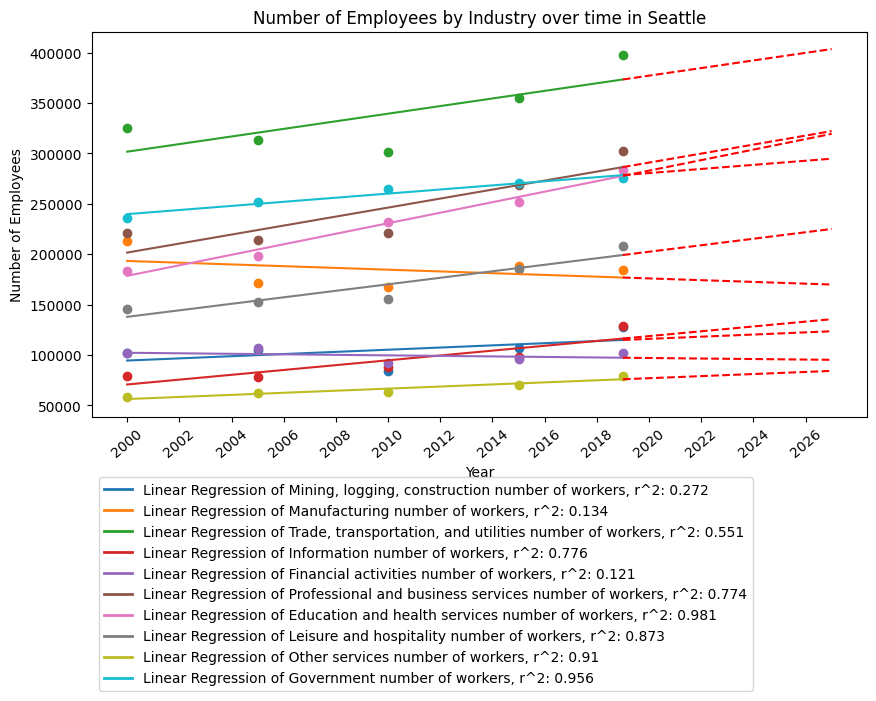

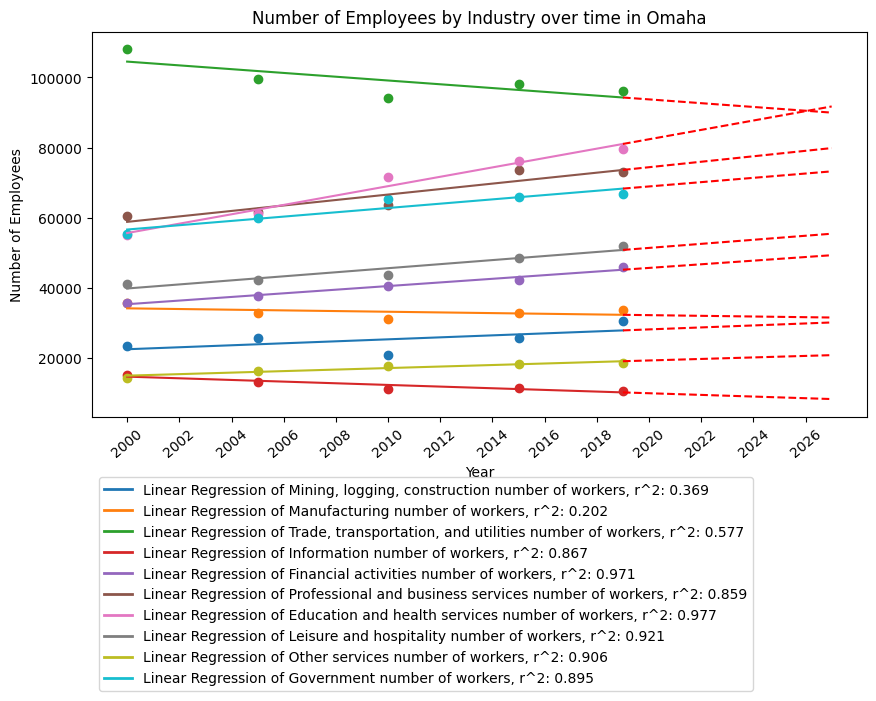

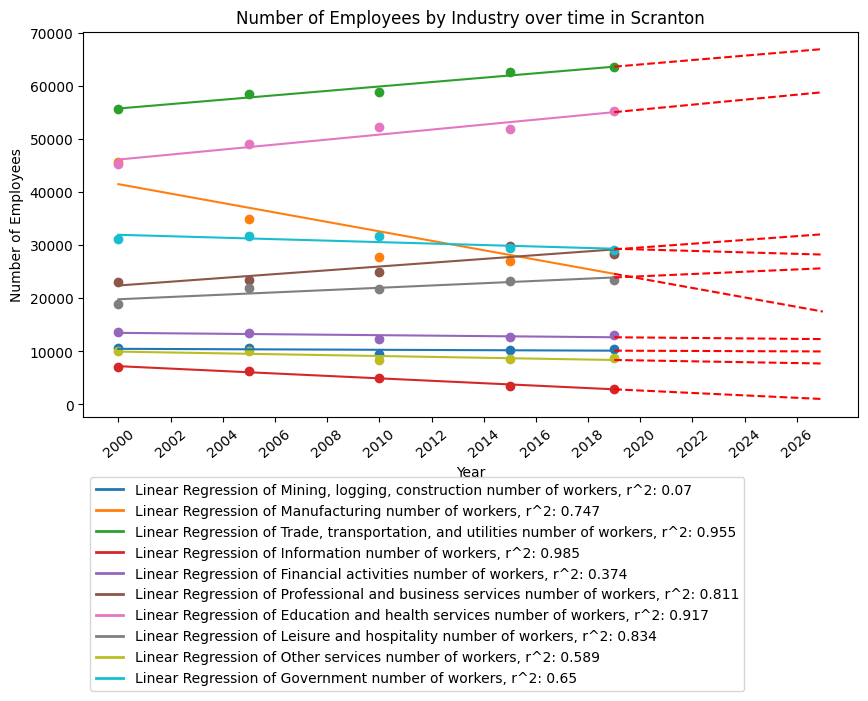

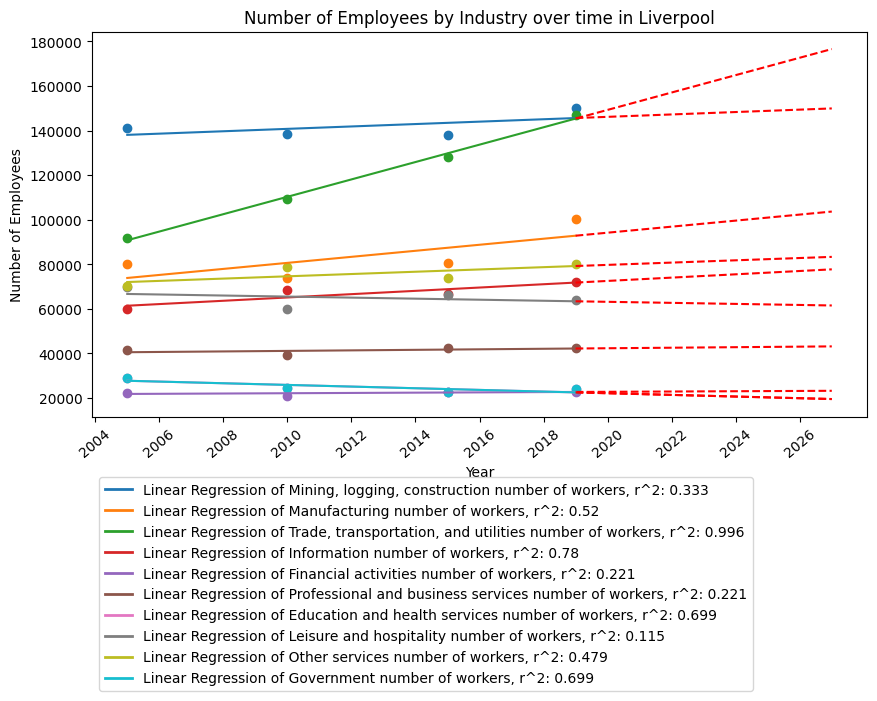

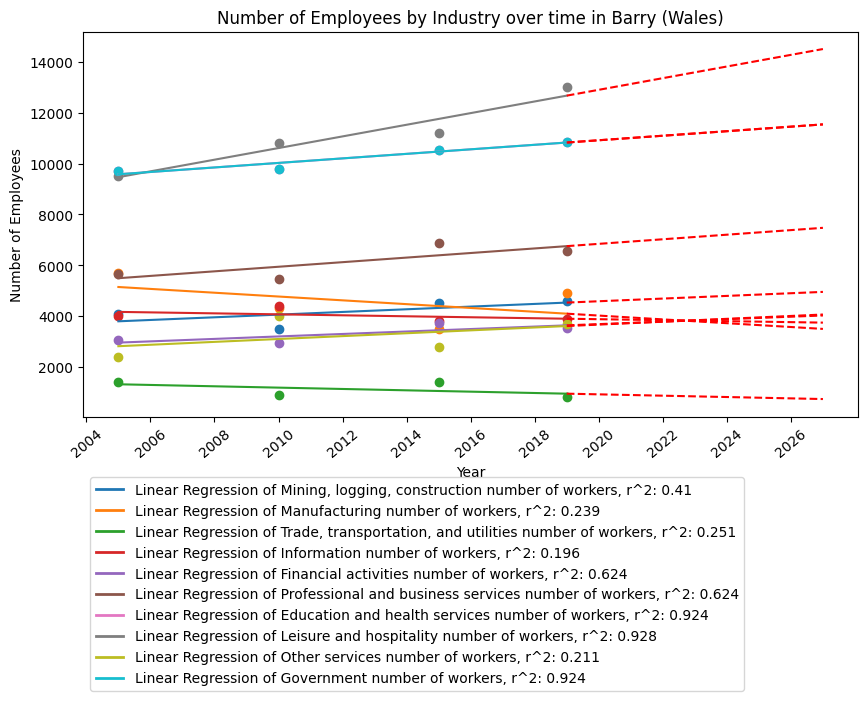

Minimum r^2: 0.06964
Mean r^2: 0.62436


In [18]:
# plot with linear regression for each industry for each city in US and record values at 2024 and 2027
minimumR2 = 1
totalR2 = 0
numR2Values = 0

i = 0
for country in [numUSEmployeesByIndustryByCity, numUKEmployeesByIndustryByCity]:
    i += 1
    industryYears = USIndustryYears if i == 1 else UKIndustryYears
    for city in country:
        # set size of graph
        plt.figure(figsize=(10, 5))
        plt.xlabel('Year')
        plt.ylabel('Number of Employees')
        plt.title('Number of Employees by Industry over time in ' + city)
        legendList = []
        legendLinesList = []
        for industry in country[city]:
            # plots points
            plt.scatter(industryYears, country[city][industry])

            # adjusts x ticks and rotates them 45 degrees
            plt.xticks(np.arange(2000, 2027)[::2], rotation=40)

            # plots linear regression
            m, b = np.polyfit(industryYears, country[city][industry], 1)
            linearRegression, = plt.plot(industryYears, m*industryYears + b)

            # calculates r^2
            r2 = r2_score(country[city][industry], m*industryYears + b)
            totalR2 += r2
            numR2Values += 1
            if r2 < minimumR2:
                minimumR2 = r2

            # adds to legend
            legendList.append(f'Linear Regression of {industry} number of workers, r^2: {round(r2, 3)}')
            legendLinesList.append(Line2D([0], [0], color=linearRegression.get_color(), lw=2))

            # extrapolates linear regression to 2027
            extrapolatedYears = np.array([2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027])
            extrapolatedNumEmployees = m*extrapolatedYears + b
            plt.plot(extrapolatedYears, extrapolatedNumEmployees, 'r--')

            # records values at 2024 and 2027 into original dictionary for cities
            valueAt2024 = m*2024 + b
            valueAt2027 = m*2027 + b
            country[city][industry] = np.append(country[city][industry], valueAt2024)
            country[city][industry] = np.append(country[city][industry], valueAt2027)

        plt.legend(legendLinesList, legendList, bbox_to_anchor=(-0, -0.14), loc='upper left')
        plt.show()

print('Minimum r^2:', round(minimumR2, 5))
print('Mean r^2:', round(totalR2 / numR2Values, 5))

In [22]:
percentWorkersWhoCanWorkFromHome2024 = {
    "Seattle": 0,
    "Omaha": 0,
    "Scranton": 0,
    "Liverpool": 0,
    "Barry (Wales)": 0,
}
 
percentWorkersWhoCanWorkFromHome2027 = {
    "Seattle": 0,
    "Omaha": 0,
    "Scranton": 0,
    "Liverpool": 0,
    "Barry (Wales)": 0,
}

for country in [numUSEmployeesByIndustryByCity, numUKEmployeesByIndustryByCity]:
    for city in country:
        totalWorkers2024 = 0
        totalWorkers2027 = 0
        
        totalWorkersWhoCanWorkFromHome2024 = 0
        totalWorkersWhoCanWorkFromHome2027 = 0
        for industry in country[city]:
            totalWorkersWhoCanWorkFromHome2024 += country[city][industry][-2] * industriesPercentAbleToWorkAtHome[industry]
            totalWorkersWhoCanWorkFromHome2027 += country[city][industry][-1] * industriesPercentAbleToWorkAtHome[industry]

            totalWorkers2024 += country[city][industry][-2]
            totalWorkers2027 += country[city][industry][-1]
        value2024 = totalWorkersWhoCanWorkFromHome2024 / totalWorkers2024 * 100
        value2027 = totalWorkersWhoCanWorkFromHome2027 / totalWorkers2027 * 100

        percentWorkersWhoCanWorkFromHome2024[city] = value2024
        percentWorkersWhoCanWorkFromHome2027[city] = value2027

        print("\n")
        print(city + ":")
        print(f'  Percent of workers who can work from home in 2024:', round(value2024, 2), '%')
        print(f'  Percent of workers who can work from home in 2027:', round(value2027, 2), '%')



Seattle:
  Percent of workers who can work from home in 2024: 48.51 %
  Percent of workers who can work from home in 2027: 48.85 %


Omaha:
  Percent of workers who can work from home in 2024: 50.86 %
  Percent of workers who can work from home in 2027: 51.4 %


Scranton:
  Percent of workers who can work from home in 2024: 46.43 %
  Percent of workers who can work from home in 2027: 46.85 %


Liverpool:
  Percent of workers who can work from home in 2024: 28.8 %
  Percent of workers who can work from home in 2027: 28.35 %


Barry (Wales):
  Percent of workers who can work from home in 2024: 52.58 %
  Percent of workers who can work from home in 2027: 52.56 %


In [39]:
# pribability of working at home per city out of remote-ready workers calculated via model for Q2
#probabilityOfWorkingFromHomePerCity = {
#    "Seattle": 0.2148,
#    "Omaha": 0.2076,
#    "Scranton": 0.2036,
#    "Liverpool": 0.2134,
#    "Barry (Wales)": 0.2076,
#}

# Data from reference D2 City Demographic Data
cities = {
    "Seattle": {
        "Country": "USA",
        "PercentageBelow20": 0.24,
        "Percentage20To29": 0.15,

        "LessthanHS": 0.072,
        "HS": 0.191,
        "SomeCollege": 0.295,
        "Bachelors": 0.269,
        "PostGraduateDegree": 0.173,

        "CommuteTime": 31.6,

        "Lessthan10k$": 0.038,
        "10kto20k$": 0.037,
        "20kto30k$": 0.033,
        "30kto40k$": 0.039,
        "40kto50k$": 0.036,
        "50kto60k$": 0.040,
        "60k-75k$": 0.060,
        "75to100k$": 0.082,
        "100kto125k$": 0.102,
        "125kto150k$": 0.079,
        "150kto200k$": 0.131,
        "Greaterthan200k$": 0.322,
    },
    "Omaha": {
        "Country": "USA",
        "PercentageBelow20": 0.28,
        "Percentage20To29": 0.13,

        "LessthanHS": 0.073,
        "HS": 0.242,
        "SomeCollege": 0.31,
        "Bachelors": 0.246,
        "PostGraduateDegree": 0.131,

        "CommuteTime": 21.1,

        "Lessthan10k$": 0.049,
        "10kto20k$": 0.06,
        "20kto30k$": 0.075,
        "30kto40k$": 0.073,
        "40kto50k$": 0.077,
        "50kto60k$": 0.079,
        "60k-75k$": 0.105,
        "75to100k$": 0.135,
        "100kto125k$": 0.096,
        "125kto150k$": 0.071,
        "150kto200k$": 0.09,
        "Greaterthan200k$": 0.091,
        "PercentageBelow20": 0.225,
        "Percentage20To29": 0.123,

        "LessthanHS": 0.087,
        "HS": 0.39,
        "SomeCollege": 0.277,
        "Bachelors": 0.149,
        "PostGraduateDegree": 0.095,

        "CommuteTime": 23.7,

        
        "Lessthan10k$": 0.064,
        "10kto20k$": 0.144,
        "20kto30k$": 0.102,
        "30kto40k$": 0.116,
        "40kto50k$": 0.097,
        "50kto60k$": 0.077,
        "60k-75k$": 0.078,
        "75to100k$": 0.092,
        "100kto125k$": 0.059,
        "125kto150k$": 0.054,
        "150kto200k$": 0.035,
        "Greaterthan200k$": 0.082,
    },
    "Liverpool": {
        "Country": "UK",
        "PercentageBelow20": 0.234,
        "Percentage20To29": 0.162,

        "LessthanHS": 0.19,
        "HS": 0.398,
        "SomeCollege": 0.137,
        "Bachelors": 0.137,
        "PostGraduateDegree": 0.137,

        "CommuteTime": 29.0,

        "Lessthan10k": 0,
        "10kto15k": 0,
        "15kto20k": 0.00,
        "20kto30k": 0.00,
        "30kto40k": 0.00,
        "40kto50k": 0.00,
        "Geaterthan50k": 0.00,
    },
    "Barry (Wales)": {
        "Country": "UK",
        "PercentageBelow20": 0.268,
        "Percentage20To29": 0.127,

        "LessthanHS": 0.252,
        "HS": 0.393,
        "SomeCollege": 0.1285,
        "Bachelors": 0.1285,
        "PostGraduateDegree": 0.098,

        "CommuteTime": 25.4,

        "Lessthan10k": 0,
        "10kto15k": 0,
        "15kto20k": 0.00,
        "20kto30k": 0.00,
        "30kto40k": 0.00,
        "40kto50k": 0.00,
        "Geaterthan50k": 0.00,
    }
}

probabilityOfWorkingFromHomePerCity = {
    "Seattle": 0.2157,
    "Omaha": 0.2833, # needs double checking 
    "Scranton": 0,
    "Liverpool": 0,
    "Barry (Wales)": 0,
}

# calculates probability of working from home per city out of remote-ready workers
for city in cities:
    probNumerator = 0
    # Age, must interpolate as data ranges do not match are solution paper table ranges
    probNumerator += (cities[city]["PercentageBelow20"] * (2/20) + cities[city]["Percentage20To29"] * (5/9))*0.27 # 18-25
    probNumerator += (cities[city]["Percentage20To29"]*(4/9) + (1-cities[city]["PercentageBelow20"]-cities[city]["Percentage20To29"]) * (11/46))*0.41 # 26-41
    probNumerator += ((1-cities[city]["PercentageBelow20"]-cities[city]["Percentage20To29"]) * (16/46))*0.40 # 42-57
    probNumerator += ((1-cities[city]["PercentageBelow20"]-cities[city]["Percentage20To29"]) * (19/46))*0.38 # 58-76

    # Commute time
    if cities[city]["CommuteTime"] < 15:
        probNumerator += 0.09
    elif cities[city]["CommuteTime"] <= 30:
        probNumerator += 0.109
    elif cities[city]["CommuteTime"] <= 60:
        probNumerator += 0.127
    elif cities[city]["CommuteTime"] <= 120:
        probNumerator += 0.167
    elif cities[city]["CommuteTime"] > 120:
        probNumerator += 0.474

    # Education  attainment
        
    # degree or equivelent
    probNumerator += (cities[city]["Bachelors"]+cities[city]["PostGraduateDegree"])*0.8701

    # Below degree level
    probNumerator += (cities[city]["HS"]+cities[city]["SomeCollege"])*0.1299

    # Other qualification
    # We don't have any data for what percentage of people have other qualifications so we can't calculate this

    # None
    probNumerator += (cities[city]["LessthanHS"])*0.6667

    # Income, must also interpolate as data ranges do not match are solution paper table ranges

    # Seperate by country as income data is different for UK and US
    if cities[city]["Country"] == "UK":
        pass
    else:
        pass
    
    probability = probNumerator/4
    probabilityOfWorkingFromHomePerCity[city] = probability


# model for Q3

percentOfWorkersWorkingFromHomeByCity2024 = {
    "Seattle": 0,
    "Omaha": 0,
    "Scranton": 0,
    "Liverpool": 0,
    "Barry (Wales)": 0,
}

percentOfWorkersWorkingFromHomeByCity2027 = {
    "Seattle": 0,
    "Omaha": 0,
    "Scranton": 0,
    "Liverpool": 0,
    "Barry (Wales)": 0,
}

# multiples probability of working at home per city out of remote-ready workers by percent of workers who can work from home in 2024 and 2027
# to get percent of workers in each city who will work from home in 2024 and 2027
print("2024: ")
for city in percentWorkersWhoCanWorkFromHome2024:
    percentOfWorkersWorkingFromHomeByCity2027[city] = percentWorkersWhoCanWorkFromHome2024[city] * probabilityOfWorkingFromHomePerCity[city]
    print("    " + city + " in 2024:")
    print(f"    Percent of workers working from home:", round(percentOfWorkersWorkingFromHomeByCity2027[city], 2), "%\n")

print("\n2027: ")
for city in percentWorkersWhoCanWorkFromHome2027:
    percentOfWorkersWorkingFromHomeByCity2027[city] = percentWorkersWhoCanWorkFromHome2027[city] * probabilityOfWorkingFromHomePerCity[city]
    print("    " + city + " in 2027:")
    print(f"    Percent of workers working from home:", round(percentOfWorkersWorkingFromHomeByCity2027[city], 2), "%\n")

2024: 
    Seattle in 2024:
    Percent of workers working from home: 10.46 %

    Omaha in 2024:
    Percent of workers working from home: 14.41 %

    Scranton in 2024:
    Percent of workers working from home: 0.0 %

    Liverpool in 2024:
    Percent of workers working from home: 0.0 %

    Barry (Wales) in 2024:
    Percent of workers working from home: 0.0 %


2027: 
    Seattle in 2027:
    Percent of workers working from home: 10.54 %

    Omaha in 2027:
    Percent of workers working from home: 14.56 %

    Scranton in 2027:
    Percent of workers working from home: 0.0 %

    Liverpool in 2027:
    Percent of workers working from home: 0.0 %

    Barry (Wales) in 2027:
    Percent of workers working from home: 0.0 %

